<a href="https://colab.research.google.com/github/Simon-creator-jara/Inteligencia_artificial/blob/main/ML1_Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set_theme(style="ticks", color_codes=True)

In [ ]:
df = pd.read_csv("insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


En primer lugar, queremos observar si basta con realizar una correlación entre la edad y el costo de las facturas médicas.

In [ ]:
edadcosto = df.loc[:,["age", "expenses"]]
edadcosto.head()

,age,expenses
0,19,16884.92
1,18,1725.55
2,28,4449.46
3,33,21984.47
4,32,3866.86


<function matplotlib.pyplot.show>

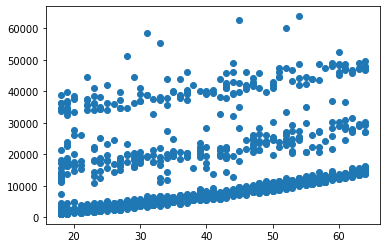

In [ ]:
plt.scatter(x = edadcosto["age"], y = edadcosto["expenses"])
plt.show

In [ ]:
#Matriz de Correlación
print(edadcosto["age"].corr(edadcosto["expenses"]))
corr = edadcosto.corr()
corr.style.background_gradient(cmap='coolwarm')

0.29900819228508274


,age,expenses
age,1.000000,0.299008
expenses,0.299008,1.000000


Relación entre el sexo y el costo

In [ ]:
sexocosto = df.loc[:,["sex", "expenses"]]
sexocosto.head()

,sex,expenses
0,female,16884.92
1,male,1725.55
2,male,4449.46
3,male,21984.47
4,male,3866.86


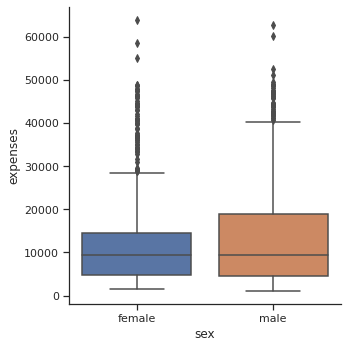

In [ ]:
sns.catplot(x="sex", y="expenses", kind="box", data=sexocosto)

Estadística de la regresión lineal en el primer caso

In [ ]:
edadcosto.head()
regresion1 = sm.OLS(edadcosto["expenses"], edadcosto[["age", "Cte"]]).fit()
print(regresion1.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           4.89e-29
Time:                        14:42:27   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          257.7226     22.502     11.453      0.0

In [ ]:
import statsmodels.formula.api as fm
regresion1f = fm.ols(formula = 'expenses ~ age', data = edadcosto).fit()
print(regresion1f.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           4.89e-29
Time:                        14:25:32   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3165.8852    937.149      3.378      0.0

El intercepto es 3165.8851877923116 y el coeficiente es [257.72261783]


<function matplotlib.pyplot.show>

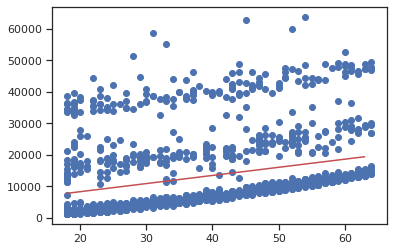

In [ ]:
edad = edadcosto["age"].to_numpy()
costo = edadcosto["expenses"].to_numpy()
edadre =edad.reshape(-1,1)
red = LinearRegression().fit(edadre, costo)
print(f"El intercepto es {red.intercept_} y el coeficiente es {red.coef_}")
plt.scatter(edad,costo)
xmax = edad.max()
xmin = edad.min()
x = np.arange(xmin,xmax,1)
ec = red.intercept_ + red.coef_[0]*x
plt.plot(x,ec,"r")
plt.show

R2 "Bien", aunque se puede mejorar aún más, si se incluyeran más variables.

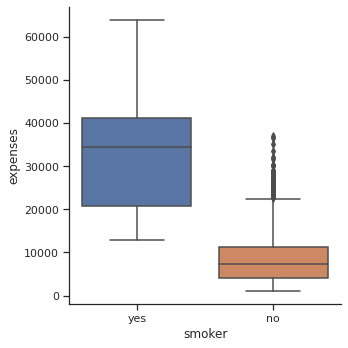

In [ ]:
sns.catplot(x="smoker", y="expenses", kind="box", data=df)

In [ ]:
numericasx = df.loc[:,["age", "bmi", "children"]]
numericasx.insert(0, "Cte", 1)
y = df.loc[:,["expenses"]]
regresion2 = sm.OLS(y, numericasx).fit()
print(regresion2.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.74
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           8.32e-37
Time:                        14:45:55   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cte        -6929.3145   1757.434     -3.943      0.0

In [ ]:
dummie = pd.get_dummies(df)
dummie.head()
regresiontot = fm.ols(formula = 'expenses ~ age + bmi + children + sex_female + sex_male + smoker_no + smoker_yes + region_northeast + region_northwest + region_southeast + region_southwest', data = dummie).fit()
print(regresiontot.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.9
Date:                Sat, 11 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:50:47   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -297.9658    430.514  